In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [40]:
data = pd.read_csv('/content/creditcard.csv')

In [41]:
data.shape

(94568, 29)

In [42]:
data.head()

217  0.144381892190689  1.39537537661217  \
128750 -2.608490 -1.679881           0.811057          0.093623   
        1.819611 -0.867944           0.110822          1.582205   
128751 -0.373840  0.786529          -0.393108         -0.671182   
        1.973821 -0.419579          -0.226370          0.536487   
       -5.941169 -2.122654          -3.818617         -0.073841   

                  -0.692226775815519  1.29122984673248  -1.26443600965948  \
128750 -2.608490            0.942956         -0.759330          -0.824826   
        1.819611           -0.985920          0.700769          -1.156132   
128751 -0.373840            1.865646          0.004400           0.778978   
        1.973821           -0.848558         -0.631379          -0.610020   
       -5.941169           -2.365728          1.189172           0.031099   

                  0.584124759733519  1.84538314665087  0.100814963045189  \
128750 -2.608490           0.822160          0.028462          -0.714276   
        1.819611           0.417696          2.304838          -0.037828   
128751 -0.373840           0.040318         -0.430378          -1.320326   
        1.973821          -0.055102          1.497125          -0.159940   
       -5.941169           2.088835         -0.856710          -0.060719   

                  -0.480317360399715  ...  -0.0196581854981697  \
128750 -2.608490            0.531187  ...             0.581450   
        1.819611           -2.622711  ...            -0.084626   
128751 -0.373840            0.294798  ...             0.095235   
        1.973821           -1.011181  ...             0.192500   
       -5.941169           -1.292447  ...             0.068423   

                  0.189133330092212  0.188926398405044  0.171834880838019  \
128750 -2.608490           0.689316           0.038158           0.777709   
        1.819611          -0.025546           0.121450          -0.852189   
128751 -0.373840           0.429761          -0.360922          -0.182253   
        1.973821           0.805242           0.122542           0.066559   
       -5.941169           0.456502          -1.526169          -0.105133   

                  -0.234442730119598  -0.693627050097437  0.085137570602571  \
128750 -2.608490            0.042208           -0.213716           0.264052   
        1.819611           -0.228700           -0.621801           0.081976   
128751 -0.373840           -0.051952            0.557178           0.119825   
        1.973821           -0.104628           -0.215145           0.040549   
       -5.941169           -0.414160            0.012757           0.602620   

                  -0.0269134423290882    37.4  0  
128750 -2.608490            -0.198031  126.51  0  
        1.819611            -0.025322   60.00  0  
128751 -0.373840             0.194073    4.26  0  
        1.973821            -0.036549    9.99  0  
       -5.941169            -0.379198  340.00  0  

[5 rows x 29 columns]

In [43]:
data.describe()

,217,0.144381892190689,1.39537537661217,-0.692226775815519,1.29122984673248,-1.26443600965948,0.584124759733519,1.84538314665087,0.100814963045189,-0.480317360399715,...,-0.0196581854981697,0.189133330092212,0.188926398405044,0.171834880838019,-0.234442730119598,-0.693627050097437,0.085137570602571,-0.0269134423290882,37.4,0
count,94568.000000,94568.000000,94568.000000,94568.000000,94568.000000,94568.000000,94568.000000,94568.000000,94568.000000,94568.000000,...,94568.000000,94568.000000,94568.000000,94568.000000,94568.000000,94568.000000,94568.000000,94568.000000,94568.000000,94568.000000
mean,-0.021366,-0.746748,-0.174948,0.265071,-0.102099,0.120429,-0.043593,-0.024069,0.031854,-0.293354,...,0.036184,0.117537,0.035559,-0.010986,-0.141286,-0.015842,-0.003633,-0.004233,86.476096,0.001280
std,1.709638,1.401393,1.446529,1.388707,1.376199,1.274376,1.156068,1.009922,1.081090,0.905495,...,0.723185,0.788717,0.658873,0.611952,0.564434,0.467342,0.423382,0.364793,253.400441,0.035747
min,-50.383269,-48.325589,-5.560118,-113.743307,-20.869626,-23.386192,-39.688571,-4.944054,-12.005487,-4.010268,...,-21.620120,-7.331078,-36.666000,-2.775670,-8.696627,-1.855355,-9.895244,-15.430084,0.000000,0.000000
25%,-0.655495,-1.602435,-0.962505,-0.430065,-0.886651,-0.487307,-0.270540,-0.597427,-0.583734,-1.003091,...,-0.229434,-0.546313,-0.140052,-0.380566,-0.451176,-0.305549,-0.075586,-0.062176,5.020000,0.000000
50%,0.016802,-0.737225,-0.335741,0.254297,-0.405662,0.158112,-0.033866,-0.005821,-0.052769,-0.296591,...,0.029114,0.175181,0.042150,0.016924,-0.199079,-0.032338,-0.009546,-0.028427,20.000000,0.000000
75%,0.830550,0.112697,0.424442,0.878683,0.287527,0.748114,0.293891,0.552453,0.501685,0.439039,...,0.250793,0.747168,0.229818,0.524626,0.217531,0.214980,0.096238,0.078684,74.577500,0.000000
max,12.730564,3.937048,15.304184,29.162172,73.301626,120.589494,10.713656,7.871113,12.424602,6.853897,...,20.063786,8.272233,22.528412,4.584549,6.070850,3.415636,31.612198,15.942151,25691.160000,1.000000


In [44]:
data1=pd.DataFrame(data)

In [45]:
data.nunique()

217                    91812
0.144381892190689      91812
1.39537537661217       91812
-0.692226775815519     91812
1.29122984673248       91812
-1.26443600965948      91812
0.584124759733519      91812
1.84538314665087       91812
0.100814963045189      91812
-0.480317360399715     91812
0.530158591463361      91812
-1.3684187838038       91812
-0.401710984626309     91812
-1.51193732052212      91812
0.243200657121565      91812
-0.491713509810045     91812
0.704918885017776      91812
0.235211311644442      91812
-0.251037331716011     91812
-0.0196581854981697    91812
0.189133330092212      91812
0.188926398405044      91812
0.171834880838019      91812
-0.234442730119598     91812
-0.693627050097437     91812
0.085137570602571      91812
-0.0269134423290882    91812
37.4                   17793
0                          2
dtype: int64

In [46]:
data1.dtypes

217                    float64
0.144381892190689      float64
1.39537537661217       float64
-0.692226775815519     float64
1.29122984673248       float64
-1.26443600965948      float64
0.584124759733519      float64
1.84538314665087       float64
0.100814963045189      float64
-0.480317360399715     float64
0.530158591463361      float64
-1.3684187838038       float64
-0.401710984626309     float64
-1.51193732052212      float64
0.243200657121565      float64
-0.491713509810045     float64
0.704918885017776      float64
0.235211311644442      float64
-0.251037331716011     float64
-0.0196581854981697    float64
0.189133330092212      float64
0.188926398405044      float64
0.171834880838019      float64
-0.234442730119598     float64
-0.693627050097437     float64
0.085137570602571      float64
-0.0269134423290882    float64
37.4                   float64
0                        int64
dtype: object

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 94568 entries, (128750, -2.60848997720896) to (172792, -0.53341252200504)
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   217                  94568 non-null  float64
 1   0.144381892190689    94568 non-null  float64
 2   1.39537537661217     94568 non-null  float64
 3   -0.692226775815519   94568 non-null  float64
 4   1.29122984673248     94568 non-null  float64
 5   -1.26443600965948    94568 non-null  float64
 6   0.584124759733519    94568 non-null  float64
 7   1.84538314665087     94568 non-null  float64
 8   0.100814963045189    94568 non-null  float64
 9   -0.480317360399715   94568 non-null  float64
 10  0.530158591463361    94568 non-null  float64
 11  -1.3684187838038     94568 non-null  float64
 12  -0.401710984626309   94568 non-null  float64
 13  -1.51193732052212    94568 non-null  float64
 14  0.243200657121565    94568 non-null  f

In [48]:
data1.ndim

2

In [49]:
data.dropna()

217  0.144381892190689  1.39537537661217  \
128750 -2.608490   -1.679881           0.811057          0.093623   
        1.819611   -0.867944           0.110822          1.582205   
128751 -0.373840    0.786529          -0.393108         -0.671182   
        1.973821   -0.419579          -0.226370          0.536487   
       -5.941169   -2.122654          -3.818617         -0.073841   
...                      ...                ...               ...   
172786 -11.881118  10.071785          -9.834783         -2.066656   
172787 -0.732789   -0.055080           2.035030         -0.738589   
172788  1.919565   -0.301254          -3.249640         -0.557828   
       -0.240440    0.530483           0.702510          0.689799   
172792 -0.533413   -0.189733           0.703337         -0.506271   

                   -0.692226775815519  1.29122984673248  -1.26443600965948  \
128750 -2.608490             0.942956         -0.759330          -0.824826   
        1.819611            -0.985920          0.700769          -1.156132   
128751 -0.373840             1.865646          0.004400           0.778978   
        1.973821            -0.848558         -0.631379          -0.610020   
       -5.941169            -2.365728          1.189172           0.031099   
...                               ...               ...                ...   
172786 -11.881118           -5.364473         -2.606837          -4.918215   
172787 -0.732789             0.868229          1.058415           0.024330   
172788  1.919565             2.630515          3.031260          -0.296827   
       -0.240440            -0.377961          0.623708          -0.686180   
172792 -0.533413            -0.012546         -0.649617           1.577006   

                   0.584124759733519  1.84538314665087  0.100814963045189  \
128750 -2.608490            0.822160          0.028462          -0.714276   
        1.819611            0.417696          2.304838          -0.037828   
128751 -0.373840            0.040318         -0.430378          -1.320326   
        1.973821           -0.055102          1.497125          -0.159940   
       -5.941169            2.088835         -0.856710          -0.060719   
...                              ...               ...                ...   
172786 -11.881118           7.305334          1.914428           4.356170   
172787 -0.732789            0.294869          0.584800          -0.975926   
172788  1.919565            0.708417          0.432454          -0.484782   
       -0.240440            0.679145          0.392087          -0.399126   
172792 -0.533413           -0.414650          0.486180          -0.915427   

                   -0.480317360399715  ...  -0.0196581854981697  \
128750 -2.608490             0.531187  ...             0.581450   
        1.819611            -2.622711  ...            -0.084626   
128751 -0.373840             0.294798  ...             0.095235   
        1.973821            -1.011181  ...             0.192500   
       -5.941169            -1.292447  ...             0.068423   
...                               ...  ...                  ...   
172786 -11.881118           -1.593105  ...             0.213454   
172787 -0.732789            -0.150189  ...             0.214205   
172788  1.919565             0.411614  ...             0.232045   
       -0.240440            -1.933849  ...             0.265245   
172792 -0.533413            -1.040458  ...             0.261057   

                   0.189133330092212  0.188926398405044  0.171834880838019  \
128750 -2.608490            0.689316           0.038158           0.777709   
        1.819611           -0.025546           0.121450          -0.852189   
128751 -0.373840            0.429761          -0.360922          -0.182253   
        1.973821            0.805242           0.122542           0.066559   
       -5.941169            0.456502          -1.526169          -0.105133   
...                              ...                ...      

In [50]:
corr = data1.corr()

<Axes: >

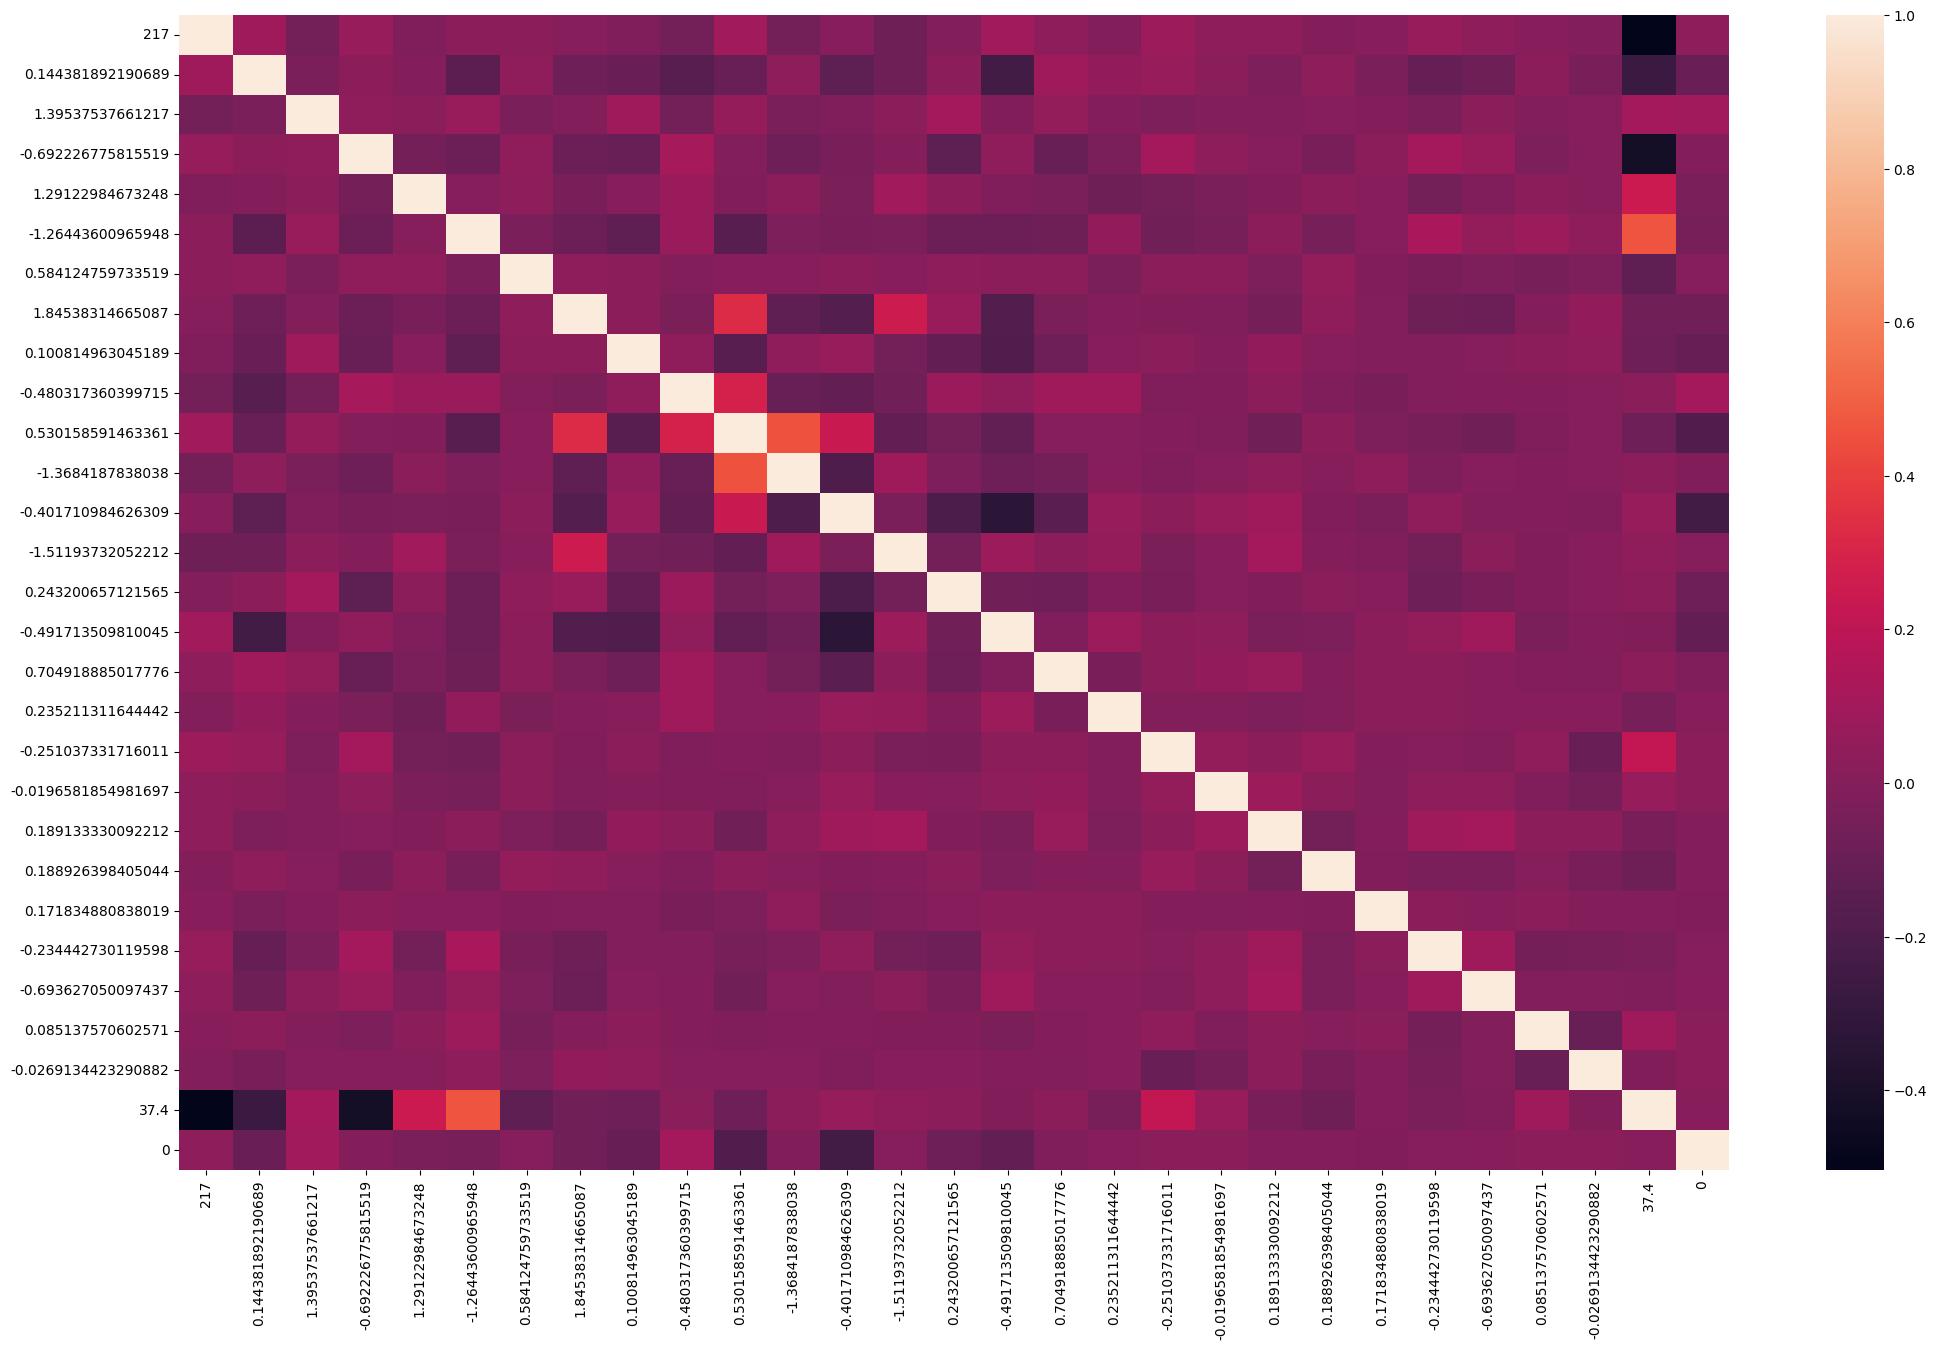

In [51]:
plt.figure(figsize=(25,15))
sns.heatmap(corr,annot = False)

In [52]:
data1['class'] = data['0']

In [53]:
Y = data1['class']

In [54]:
Y.isnull()

128750  -2.608490     False
         1.819611     False
128751  -0.373840     False
         1.973821     False
        -5.941169     False
                      ...  
172786  -11.881118    False
172787  -0.732789     False
172788   1.919565     False
        -0.240440     False
172792  -0.533413     False
Name: class, Length: 94568, dtype: bool

In [55]:
X = data.drop(columns='class',axis=1)

In [56]:
Y.head(20)

128750  -2.608490    0
         1.819611    0
128751  -0.373840    0
         1.973821    0
        -5.941169    0
         1.835124    0
128752   2.050510    0
         0.349012    0
128753  -0.747790    0
        -3.950124    0
128754   2.222223    0
        -2.085416    0
128755   1.771726    0
128756  -0.938372    0
         1.405095    0
         0.344125    0
128757  -0.252409    0
        -0.475194    0
128758   2.010200    0
         1.757910    0
Name: class, dtype: int64

In [57]:
X.head()

217  0.144381892190689  1.39537537661217  \
128750 -2.608490 -1.679881           0.811057          0.093623   
        1.819611 -0.867944           0.110822          1.582205   
128751 -0.373840  0.786529          -0.393108         -0.671182   
        1.973821 -0.419579          -0.226370          0.536487   
       -5.941169 -2.122654          -3.818617         -0.073841   

                  -0.692226775815519  1.29122984673248  -1.26443600965948  \
128750 -2.608490            0.942956         -0.759330          -0.824826   
        1.819611           -0.985920          0.700769          -1.156132   
128751 -0.373840            1.865646          0.004400           0.778978   
        1.973821           -0.848558         -0.631379          -0.610020   
       -5.941169           -2.365728          1.189172           0.031099   

                  0.584124759733519  1.84538314665087  0.100814963045189  \
128750 -2.608490           0.822160          0.028462          -0.714276   
        1.819611           0.417696          2.304838          -0.037828   
128751 -0.373840           0.040318         -0.430378          -1.320326   
        1.973821          -0.055102          1.497125          -0.159940   
       -5.941169           2.088835         -0.856710          -0.060719   

                  -0.480317360399715  ...  -0.0196581854981697  \
128750 -2.608490            0.531187  ...             0.581450   
        1.819611           -2.622711  ...            -0.084626   
128751 -0.373840            0.294798  ...             0.095235   
        1.973821           -1.011181  ...             0.192500   
       -5.941169           -1.292447  ...             0.068423   

                  0.189133330092212  0.188926398405044  0.171834880838019  \
128750 -2.608490           0.689316           0.038158           0.777709   
        1.819611          -0.025546           0.121450          -0.852189   
128751 -0.373840           0.429761          -0.360922          -0.182253   
        1.973821           0.805242           0.122542           0.066559   
       -5.941169           0.456502          -1.526169          -0.105133   

                  -0.234442730119598  -0.693627050097437  0.085137570602571  \
128750 -2.608490            0.042208           -0.213716           0.264052   
        1.819611           -0.228700           -0.621801           0.081976   
128751 -0.373840           -0.051952            0.557178           0.119825   
        1.973821           -0.104628           -0.215145           0.040549   
       -5.941169           -0.414160            0.012757           0.602620   

                  -0.0269134423290882    37.4  0  
128750 -2.608490            -0.198031  126.51  0  
        1.819611            -0.025322   60.00  0  
128751 -0.373840             0.194073    4.26  0  
        1.973821            -0.036549    9.99  0  
       -5.941169            -0.379198  340.00  0  

[5 rows x 29 columns]

In [58]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.5,stratify = Y,random_state = 5)

In [59]:
model = LogisticRegression()

In [60]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
X_train_Prediction = model.predict(X_train)
traning_data_accuracy = accuracy_score(X_train_Prediction,Y_train)
print(traning_data_accuracy)

0.9995981727434228


In [62]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print(testing_data_accuracy)

0.999661619152356


In [63]:
#saving the model

In [64]:
import pickle
filename = 'Credit_card_fraud_trained_model.sav'
pickle.dump(model,open(filename,'wb'))

In [65]:
#confusing matrix for test
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
conf_matrix

array([[47220,     3],
       [   13,    48]])